In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import warnings
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    
from sklearn.metrics import mean_squared_error
warnings.filterwarnings(action='ignore')

# **boston 데이터셋 로드**

### **변수 설명**

*   CRIM : 자치시(town) 별 1인당 범죄율
*   ZN : 25,000 평방피트를 초과하는 거주지역의 비율 
*   INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
*   CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
*   NOX : 10ppm 당 농축 일산화질소
*   RM : 주택 1가구당 평균 방의 개수
*   AGE : 1940년 이전에 건축된 소유주택의 수
*   DIS : 5개의 보스톤 직업센터까지의 접근성 지수
*   RAD : 방사형 도로까지의 접근성 지수
*   TAX : 10,000 달러 당 재산세율
*   PTRATIO : 자치시(town)별 학생/교사 비율
*   B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 뜻함.
*   LSTAT : 모집단의 하위계층의 비율(%) 즉, 빈곤층 비율
*   MEDV(target) : 본인 소유의 주택가격(중앙값) (단위:$1,000)

In [ ]:
data = load_boston()
boston_data = pd.DataFrame(data.data, columns=data.feature_names)
boston_data['MEDV'] = data.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 데이터 정보(type, 통계치, 범위 등..) 확인 및 변수별 상관분석


### **결과 해석**

*   모두 float 형태이고, CHAS 변수의 경우 더미변수이므로 0,1로 되어 있는 것을 확인할 수 있음.
*   ## **상관 분석 결과**
*   LSTAT는 빈곤층의 비율을 뜻하는데 빈곤층의 비율이 적을 수록 집값은 높음.
*   RM은 주택 1가구당 평균 방의 개수를 뜻하는데 방의 개수가 많을 수록 집값이 높음.

In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


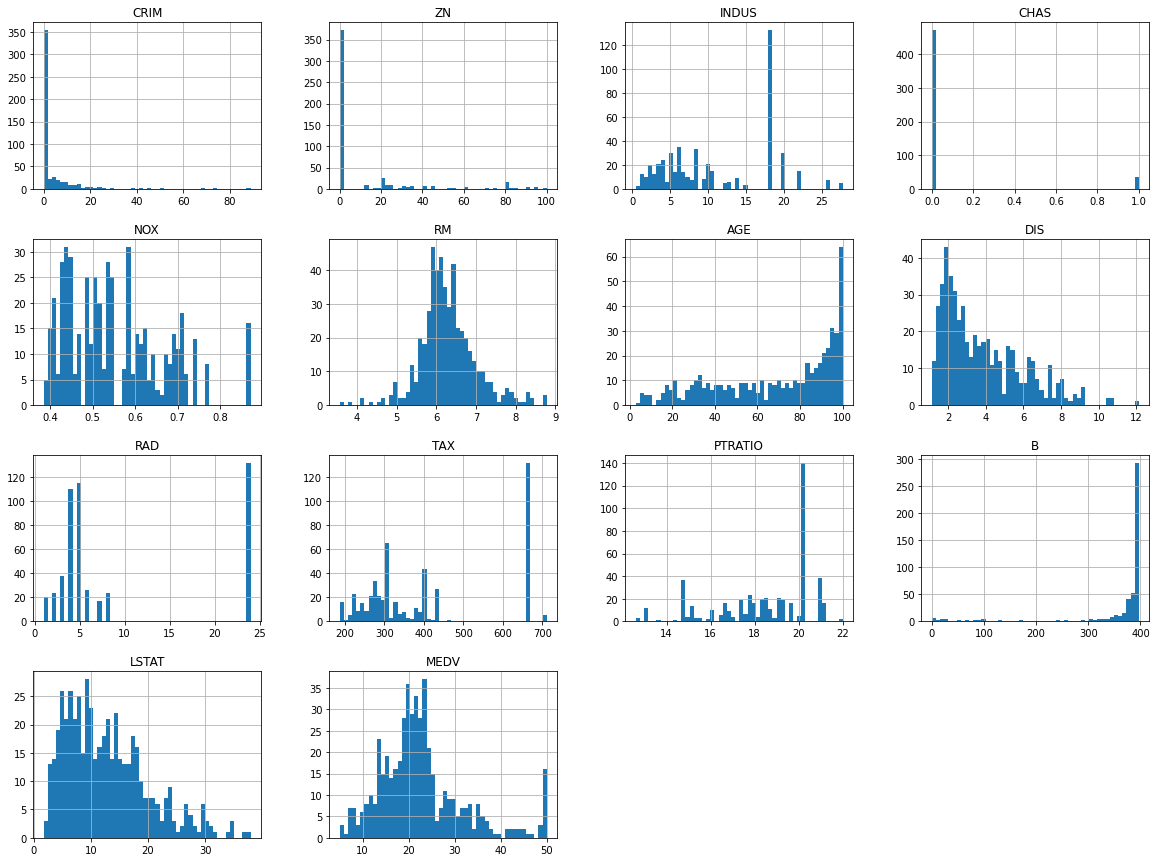

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
boston_data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = boston_data.corr()

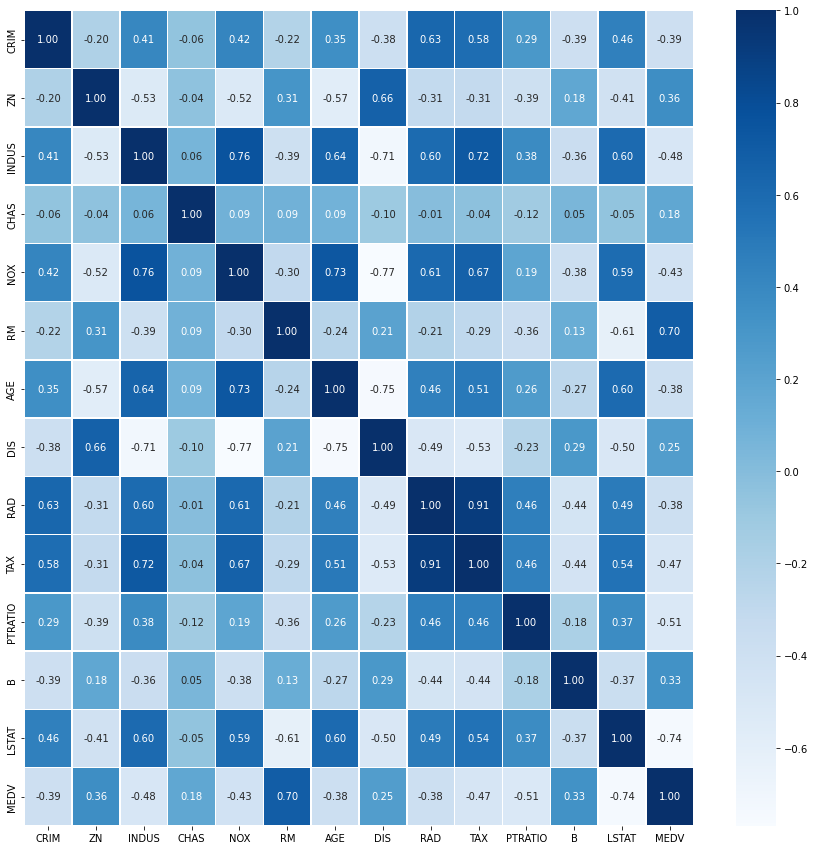

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = corr_matrix, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7b95b2750>,
      dtype=object)

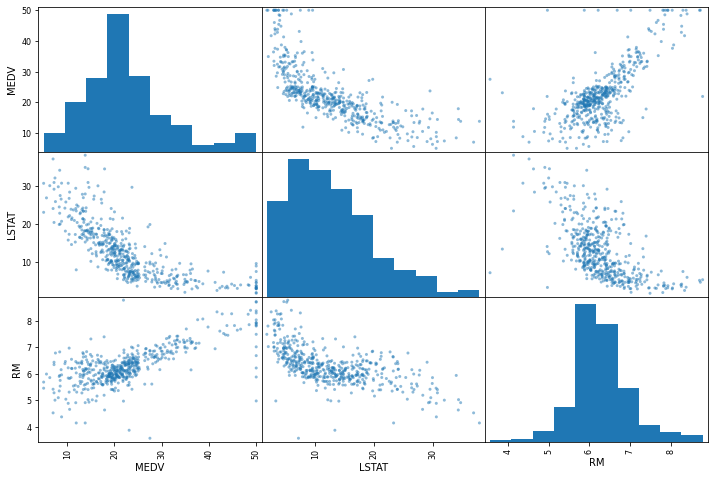

In [ ]:
# 몇개 변수만
attributes = ["MEDV", "LSTAT", "RM"]
scatter_matrix(boston_data[attributes], figsize=(12, 8))

# 선형회귀 모델
## 결과 해석

*    mse(평균제곱오차)가 작을수록 성능이 좋은 것.
*    모든 변수를 사용하여 모델을 학습을 했을 때 성능이 가장 좋음.

### 1. 상관관계가 높은 2개의 변수로 모델 학습

In [ ]:
X = boston_data[['LSTAT','RM']]
Y = boston_data['MEDV']

In [ ]:
from sklearn.linear_model import LinearRegression


lin_model = LinearRegression()
lin_model.fit(X, Y)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(X)

In [ ]:
train_mse = mean_squared_error(Y, y_pred) 
train_mse

30.51246877729948

### 2. 모든 변수를 사용하여 모델 학습

In [ ]:
X = boston_data.drop('MEDV', axis =1 )
Y = boston_data['MEDV']

In [ ]:
from sklearn.linear_model import LinearRegression


lin_model = LinearRegression()
lin_model.fit(X, Y)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(X)

In [ ]:
train_mse = mean_squared_error(Y, y_pred) 
train_mse

21.894831181729202

### 3. 상관분석 결과를 토대로 6개의 변수 추출 후 모델 학습

In [ ]:
X = boston_data[['LSTAT','RM','PTRATIO','INDUS','TAX','NOX']]
Y = boston_data['MEDV']

In [ ]:
from sklearn.linear_model import LinearRegression


lin_model = LinearRegression()
lin_model.fit(X, Y)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(X)

In [ ]:
train_mse = mean_squared_error(Y, y_pred) 
train_mse

26.92800231045072